<a href="https://colab.research.google.com/github/johnjoel2001/Human_AI_Interaction/blob/main/Assignment_09___Human___AI_Interaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**XAI - AIPI 590**

**Assignment 09 - Human - AI Interaction**

**John Rohit Ernest Jayaraj**

# **LIME Code Tutorial: Explainable AI**


**What is LIME?**

LIME (Local Interpretable Model-Agnostic Explanations) is a technique that helps explain why a machine learning model made a specific prediction.

**An Example:**

 -  Let's say that we have a model that predicts whether an email is spam or not, but we don’t know as to why it made a certain decision.

 - LIME works by slightly changing the email’s words (or features in any dataset) and checking how the model’s prediction changes.



**Working of LIME**

- **Select an Instance:** First, let us choose one prediction made by the model that we would like to explain.
- **Create Variations:** LIME perturbs (makes slight alterations) that instance.
- **Observe the Model's Response:** The model's new predictions on these slightly modified versions are observed.
- **Train a Simple Model Locally:** LIME trains a simple, small model (like linear regression) to approximate the complex model just for this instance.
- **Feature Importance:** It then tells us which features contributed most to that prediction.

**Code Walkthrough of LIME**

**Let us install the required library: `lime`**


In [17]:
!pip install lime  # Installing lime

**Now, let us import the required dependencies:**
 - `numpy` **- For Numerical Computation**
 - `pandas` **- For Data Analysis & Manipulation**
 - `matplotlib` **&** `seaborn` **- For Data Visualization**
 - `sklearn` **-** **Machine Learning Library**



In [ ]:
# Importing Dependecies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lime.lime_tabular import LimeTabularExplainer

**About Dataset**

 - In our case, for the purpose of simplicity, we will use the Iris dataset which in in-built.
 - The Iris dataset is a well-known dataset used for classification tasks.
 - It contains 150 samples of iris flowers, categorized into three species: **Setosa, Versicolor, and Virginica**
 - Each sample has four numerical features: **sepal length**, **sepal width**, **petal length**, and **petal width**.

In [18]:
from sklearn.datasets import load_iris

data = load_iris() # Loading the Iris Dataset
X = pd.DataFrame(data.data, columns=data.feature_names) # Converting Feature Data into a Dataframe
y = data.target # Extracting target labels representing the flower species


In [19]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Observations:**
 - We see that there are 150 rows in the dataset, which correspond to 150 data points.
 - We see that there are 4 columns, each corresponding to a feature: sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm).

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Observation**
- The target variable y consists of three distinct values: 0, 1, and 2, which represent the three classes of the Iris dataset:  
 - 0 -> Setosa,
1 -> Versicolor,
2 -> Virginica



**Data Splitting**
 - We shall split the dataset into training and test sets in the ratio of 80% training data and 20% test data.


In [21]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Building**
 - We shall train a Random Forest Classifier, an ensemble learning method combining multiple decision trees to improve accuracy and reduce overfitting.
 -  We shall use accuracy as the metric because it is a measure of how well the model classifies test data.

In [22]:
# Training a Random Forest Classifier

clf = RandomForestClassifier(n_estimators=100, random_state=42) # Let us keep 100 decision trees (n_estimators=100).
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) # Making Predictions on the tests et

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}") # Print the model accuracy



Model Accuracy: 1.00


**Observation**
- The Random Forest Model works superbly.
- We get an accuracy of 1 on the test set which is terrific.

**LIME**
 - Now let's use LIME (Local Interpretable Model-agnostic Explanations) to explain a specific prediction made by the trained Random Forest model.

**Craeting a LIME Explainer**

In [23]:
# Creating a LIME Explainer

explainer = LimeTabularExplainer(
    training_data=np.array(X_train), # Using training data for perturbation reference
    feature_names=X.columns, # Feature Names
    class_names=data.target_names, # Class Labels
    mode="classification"   # Specifying that this is a classification problem
)

**Selecting an Instance for Explanation**
 - We will select instances from the test set to explain why the model predicted a particular class for this instance.



In [29]:
# Selecting an Instance for Explanation

idx = 5 # We will choosing the 5th index from the test set
exp = explainer.explain_instance(X_test.iloc[idx].values, clf.predict_proba) # Generating the LIME Explanation

# Printing the predicted class for the selected instance
predicted_class = clf.predict([X_test.iloc[idx].values])[0]
print(f"Predicted class for the explained instance: {data.target_names[predicted_class]}")

Predicted class for the explained instance: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Observation:**
 -  We see that the prediction of the model for 5th index is setosa

**Visualization**
-  We will generate a clean bar plot of the feature importance.
- This plot will show which features had the most impact on the model's prediction for the selected instance.
- Positive values indicate features that contributed toward the predicted class.
- Negative values indicate features that pushed the prediction away from the class.

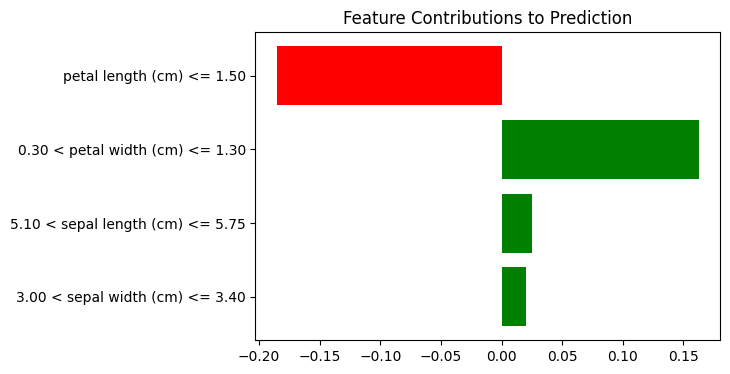

In [30]:
# Generating a bar plot of the feature importance
fig = exp.as_pyplot_figure()
fig.set_size_inches(6, 4)
plt.title("Feature Contributions to Prediction")
plt.show()


**Inferences:**

**Feature Impact on Prediction**
 - The red bar (petal length <= 1.50) has a negative contribution, indicating  it pushed the model away from the predicted class.
 - The green bars (petal width, sepal length, and sepal width) have positive contributions, indicating that these features increased the probability of the predicted class.

**Most Influential Features**
- Petal width (0.30 < petal width <= 1.30) contributed the most positively to the model’s decision.
- Petal length (<= 1.50) had the strongest negative impact, reducing the probability of the predicted class.

**Understanding the Prediction**
 - The model likely predicted this flower type because it has a medium petal width and a short petal length.
 - If the petal length had been longer, the model might have chosen a different flower type.



In [31]:
idx = 10 # We will now choose the 10th index from the test set
exp = explainer.explain_instance(X_test.iloc[idx].values, clf.predict_proba) # Generating the LIME Explanation

# Printing the predicted class for the selected instance
predicted_class = clf.predict([X_test.iloc[idx].values])[0]
print(f"Predicted class for the explained instance: {data.target_names[predicted_class]}")

Predicted class for the explained instance: virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Observation:**
 -  We see that the prediction of the model for 10th index is virginica.

**Visualization**
-  We will generate a clean bar plot of the feature importance.
- This plot will show which features had the most impact on the model's prediction for the selected instance.
- Positive values indicate features that contributed toward the predicted class.
- Negative values indicate features that pushed the prediction away from the class.

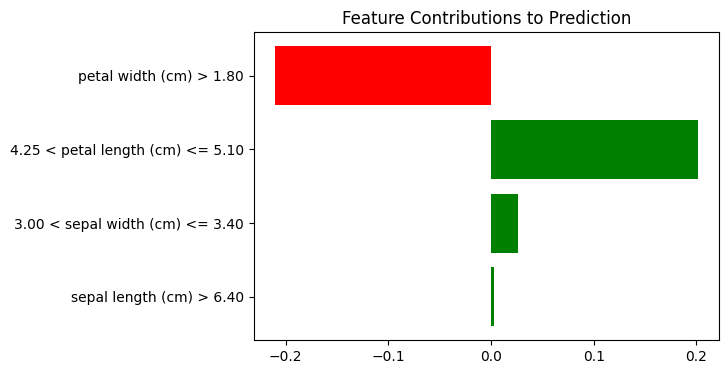

In [32]:
# Generating a bar plot of the feature importance
fig = exp.as_pyplot_figure()
fig.set_size_inches(6, 4)
plt.title("Feature Contributions to Prediction")
plt.show()


**Inferences:**

**Feature Impact on Prediction**
 - Petal width ( > 1.80 cm) has the strongest negative impact (red bar), indicating it pushed the model away from the predicted class.
 - Petal length (4.25 < petal length <= 5.10 cm) has the strongest positive impact (green bar), indicating that this feature increased the probability of the predicted class.


**Understanding the Prediction**
 - "The model likely predicted this flower type because it has a medium petal length and a narrow petal width.
 - If the petal width were smaller, the model might have chosen a different flower type

**Summary**

- We trained a Random Forest classifier on the Iris dataset.
- We used LIME to explain a specific instance from the test set.
- We visualized the feature contributions using bar charts for 2 data points from the test set.
- We plotted the explained instance in the context of the dataset.


**Note:**

AI Tools were not used in this Assignment